# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
import os
import matplotlib
import warnings

#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest

from pandas_profiling import ProfileReport



warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df.head(2)

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset with outliers

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated_with_outliers_and_pop.csv')
sample_submission = pd.read_csv('submission_for_outliers_220223_with_pop.csv')

In [6]:
#put the same order for the columns in train_consolidated and sample_submission
train_consolidated = train_consolidated[sample_submission.columns]


In [7]:
#check nulls in sample_submission 
sample_submission.isnull().sum()


PipeId                                          0
Incidence                                       0
Province                                        0
Town                                            0
YearBuilt                                       0
Diameter                                        0
Length                                          0
Pressure                                        0
NumConnections                                  0
NumConnectionsUnder                             0
BoolBridle                                      0
aspect                                          0
Relative_Thickness                              0
pipe_area                                       0
Total_Connections                               0
area_connection                                 0
connection_bool                                 0
gas_natural                                     0
Material_Acrylonitrile-Butadiene-Styrene        0
Material_Copper                                 0


## Filling Nulls in sample submission file

In [8]:
#fill the nulls in No_Inspectio with 1
sample_submission['No_Inspections'].fillna(1, inplace=True)


In [9]:
#fill the nulls in average_severity_pipe  with the mean of the column
sample_submission['average_severity_pipe'].fillna(sample_submission['average_severity_pipe'].mean(), inplace=True)

In [10]:
#fill nulls in relative_risk by multyplying No_Incidences by  average_severity_pipe
sample_submission['relative_risk'] = sample_submission['No_Previous_Incidences'] * sample_submission['average_severity_pipe']

In [11]:
#fill nulls in preventive_maintenance_rate by dividing relative_risk by No_Inspections
sample_submission['preventive_maintenance_rate'] = sample_submission['relative_risk'] / sample_submission['No_Inspections']

In [12]:
#fill the nulls in Probability_rate with No_Previous_Incidences divided by No_Inspections
sample_submission['Probability_rate'] = sample_submission['No_Previous_Incidences'] / sample_submission['No_Inspections']


## Dtypes in sample submission file

In [13]:
sample_submission.dtypes

PipeId                                        int64
Incidence                                     int64
Province                                     object
Town                                         object
YearBuilt                                   float64
Diameter                                    float64
Length                                      float64
Pressure                                    float64
NumConnections                                int64
NumConnectionsUnder                           int64
BoolBridle                                    int64
aspect                                      float64
Relative_Thickness                          float64
pipe_area                                   float64
Total_Connections                             int64
area_connection                             float64
connection_bool                               int64
gas_natural                                   int64
Material_Acrylonitrile-Butadiene-Styrene      int64
Material_Cop

In [14]:
change_dtypes(train_consolidated)
change_dtypes(sample_submission)

,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Area (sq km),Population,Population density (persons/sqkm)
0,489616,0,ciudad real,Torralba de Calatrava,2012.00,0.06,7.79,0.40,0,0,0,49.47,0.16,1.54,0,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,1,4.00,21.40,1,0.00,0,0,0,2013,16,0.00,0.00,0.00,1.00,19813,524962,26.50
1,489616,0,ciudad real,Torralba de Calatrava,2012.00,0.06,7.79,0.40,0,0,0,49.47,0.16,1.54,0,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,2,4.00,21.40,1,0.00,0,0,0,2015,22,0.00,0.00,0.00,3.00,19813,513713,25.93


,PipeId,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Area (sq km),Population,Population density (persons/sqkm)
0,446859944,0,valencia,Alginet,2012.00,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02,17.62,6.60,30.80,427,0.64,46,113.20,5.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00,2021.00,24.00,0.00,0.00,0.00,9.00,10807,2589312,239.60
1,428124500,0,valencia,Alginet,2012.00,0.16,110.71,0.15,2,0,0,103.80,1.07,55.65,2,0.04,1,1,0,0,0,1,0,0.03,12257.81,0.02,17.62,6.60,30.80,427,0.64,46,113.20,5.00,4.00,21.00,1.00,0.00,0.00,0.00,0.00,2021.00,24.00,0.00,0.00,0.00,9.00,10807,2589312,239.60


In [15]:
#drop Province, Town from sample_submission
sample_submission.drop(['Province', 'Town','Area (sq km)', 'Population'], axis=1, inplace=True)

## Standarizing data in sample submission

In [16]:
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm)
0,446859944,0,2012.00,0.11,44.29,0.15,0,0,0,60.39,0.73,15.30,0,0.00,0,1,0,0,0,1,0,0.01,1961.25,0.02,17.62,6.60,30.80,427,0.64,46,113.20,5.00,4.00,20.75,1.00,0.00,0.00,0.00,0.00,2021.00,24.00,0.00,0.00,0.00,9.00,239.60


In [17]:
sample_submission.columns

Index(['PipeId', 'Incidence', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'Total_Connections',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections', 'average_severity_pipe',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'No_Previous_Incidences', 'No_Previous_Severity_High',
       'No_Previous_Severity_Medium', 'No_Previous_Severity_Low',
       'InspectionYear', 'MonthsLastRev', 'relative_risk',

In [18]:
#import min max scaler
from sklearn.preprocessing import MinMaxScaler


In [19]:
#Use minmax scaler to scale these columns in sample_submission: 
# 'YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
#       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
#       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
#       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate'

scaler = MinMaxScaler()

sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']] = scaler.fit_transform(sample_submission[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear', 'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']])
sample_submission.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm)
0,446859944,0,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.21,1.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.17,0.28


## Correlation matrix for sample_submission

In [20]:
#grpah correlation matrix in sample_submission
corr_matrix = sample_submission.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
to_drop


['Total_Connections', 'relative_risk', 'Age_pipe_at_inspection']

In [21]:
sample_submission.corr()['Incidence'].sort_values(ascending=False)


Incidence                                   1.00
area_connection                             0.00
Pressure                                    0.00
Pressure2                                   0.00
average_severity_pipe                       0.00
YearBuilt                                   0.00
aspect                                      0.00
Population density (persons/sqkm)           0.00
Material_Acrylonitrile-Butadiene-Styrene    0.00
PipeId                                      0.00
No_Previous_Severity_Medium                 0.00
Length                                      0.00
No_Inspections                              0.00
NumConnections                              0.00
Total_Connections                           0.00
Average year Humidity (%)                   0.00
connection_bool                             0.00
pipe_area                                   0.00
Material_Fiberglass-Reinforced Plastic      0.00
InspectionYear                              0.00
Rainy days per year 

In [22]:
#DROP Total_Connections IN sample_submission
sample_submission.drop(['Total_Connections'], axis=1, inplace=True)

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Correlation matrix for sample_submission')

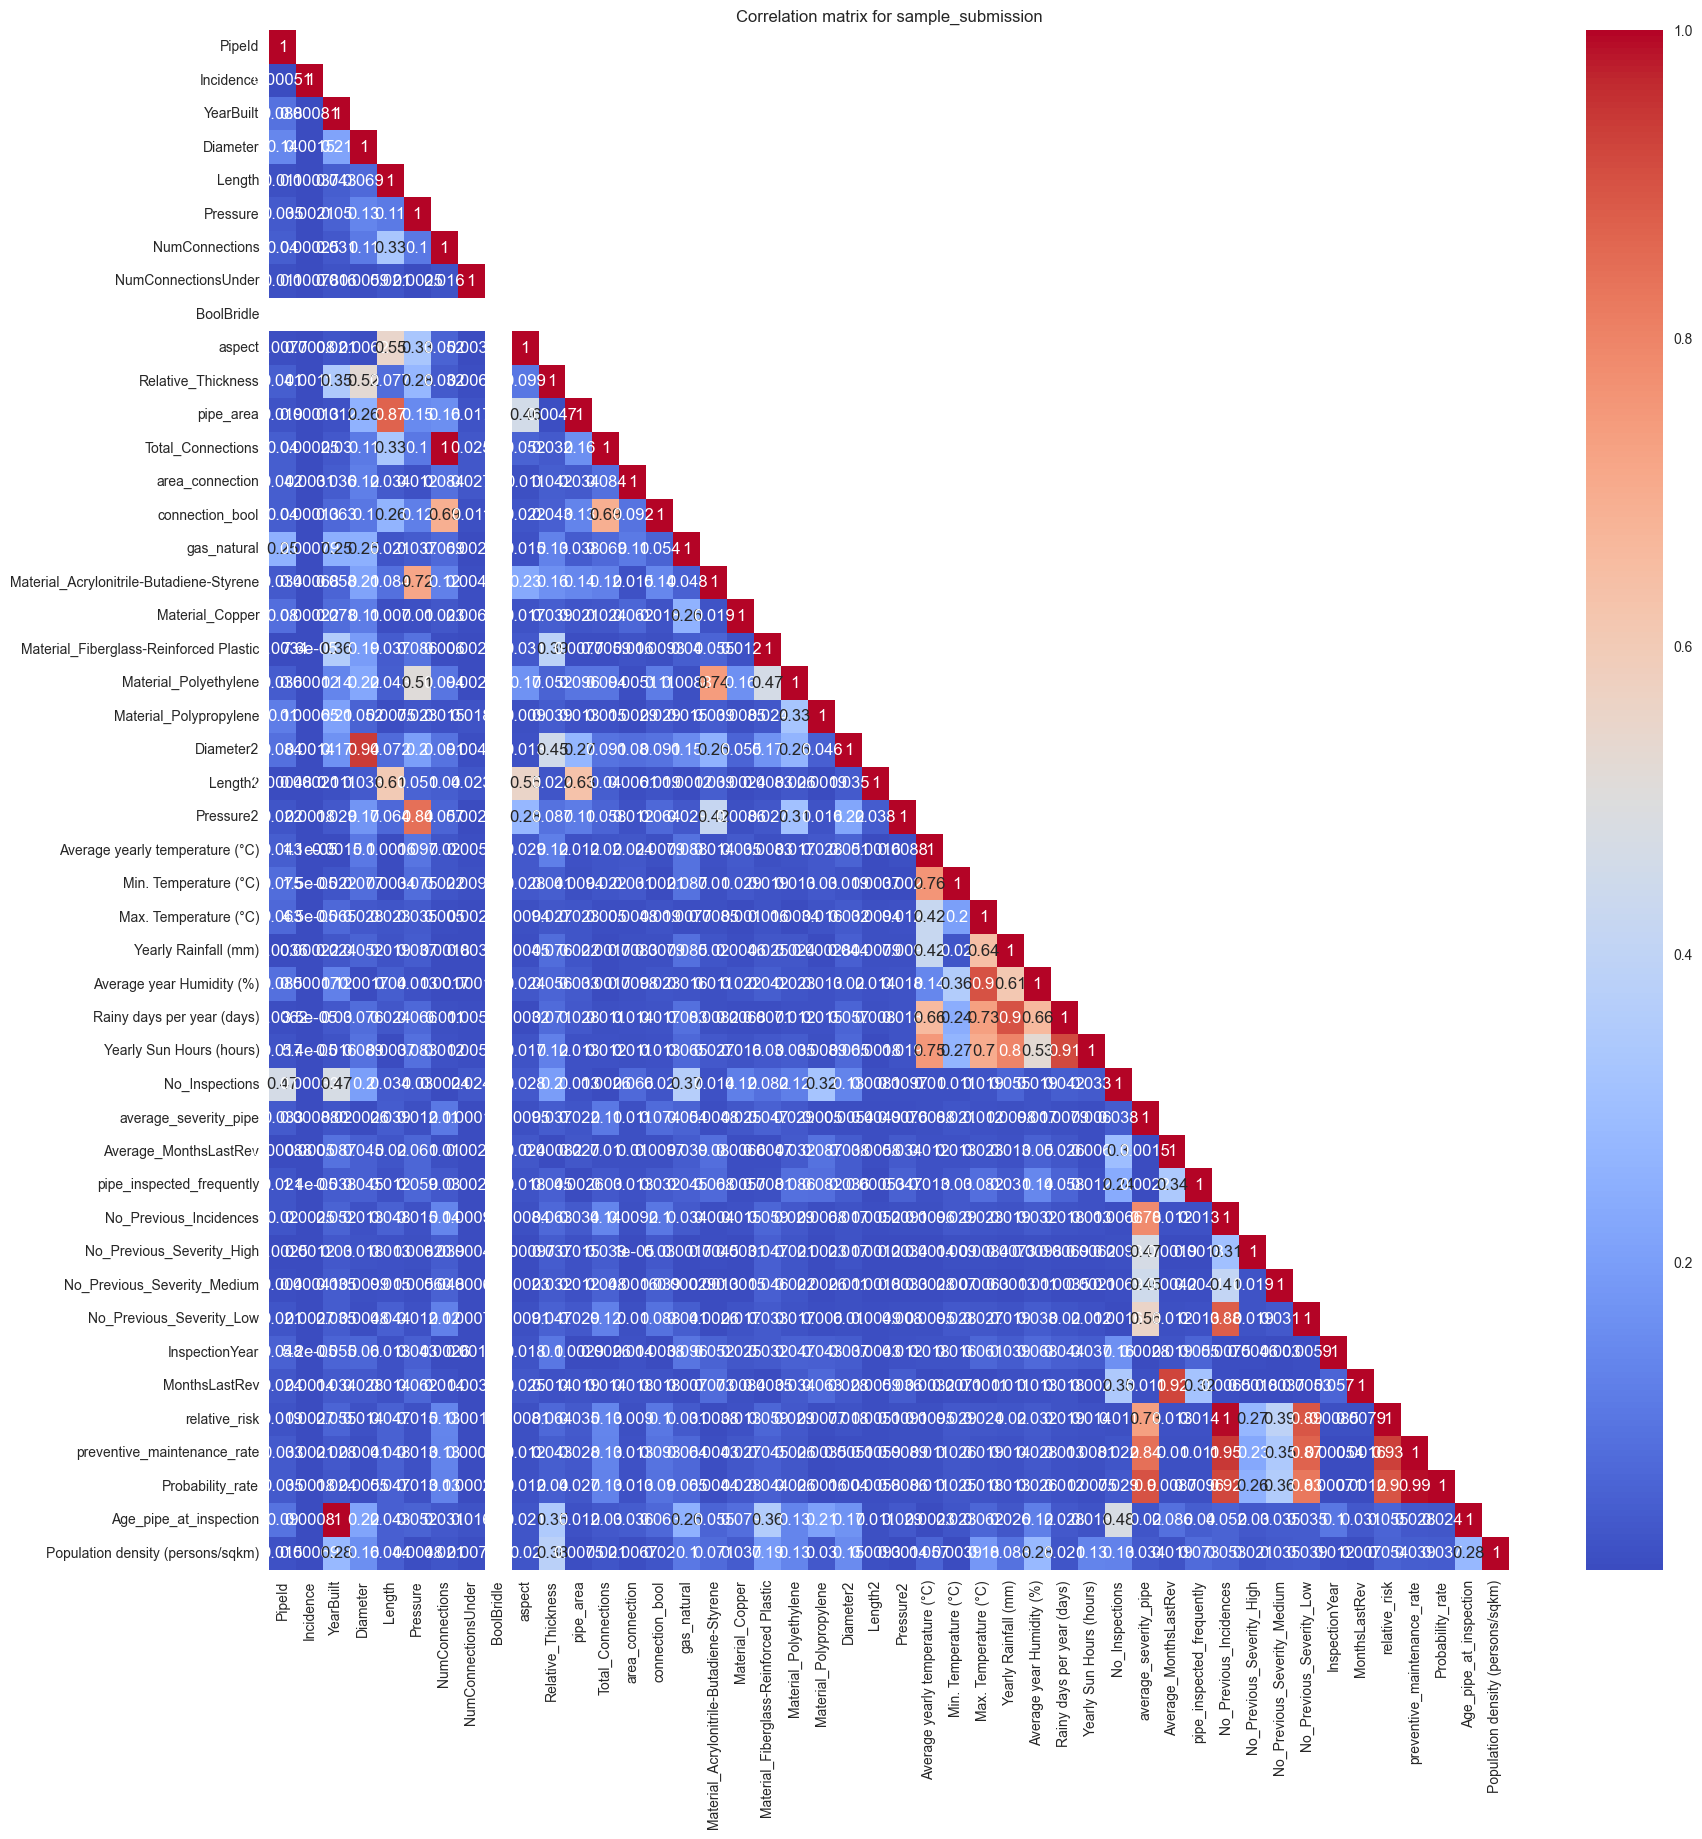

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for sample_submission')
plt.show()


We are not going to drop any variables as in now just for testing purposes


# Checking train file
## Nulls in train file

In [24]:
#checking nulls in train_consolidated
train_consolidated.isnull().sum()

PipeId                                      0
Incidence                                   0
Province                                    0
Town                                        0
YearBuilt                                   0
Diameter                                    0
Length                                      0
Pressure                                    0
NumConnections                              0
NumConnectionsUnder                         0
BoolBridle                                  0
aspect                                      0
Relative_Thickness                          0
pipe_area                                   0
Total_Connections                           0
area_connection                             0
connection_bool                             0
gas_natural                                 0
Material_Acrylonitrile-Butadiene-Styrene    0
Material_Copper                             0
Material_Fiberglass-Reinforced Plastic      0
Material_Polyethylene             

## Dtypes in train_consolidated

In [25]:
train_consolidated.dtypes

PipeId                                        int32
Incidence                                     int32
Province                                     object
Town                                         object
YearBuilt                                   float32
Diameter                                    float32
Length                                      float32
Pressure                                    float32
NumConnections                                int32
NumConnectionsUnder                           int32
BoolBridle                                    int32
aspect                                      float32
Relative_Thickness                          float32
pipe_area                                   float32
Total_Connections                             int32
area_connection                             float32
connection_bool                               int32
gas_natural                                   int32
Material_Acrylonitrile-Butadiene-Styrene      int32
Material_Cop

In [26]:
train_consolidated.columns

Index(['PipeId', 'Incidence', 'Province', 'Town', 'YearBuilt', 'Diameter',
       'Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder',
       'BoolBridle', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'InspectionYear', 'MonthsLastRe

In [27]:
#drop 'MaintenanceId', InspectionDate, Province, Province, 'Severity_high', 'Severity_medium', 'Severity_low'
train_consolidated.drop(['Province', 'Town', 'Area (sq km)', 'Population'], axis=1, inplace=True)

In [28]:
#difference in columns between train_consolidated and sample_submission
set(train_consolidated.columns) - set(sample_submission.columns)


{'Total_Connections'}

## Standarizing

In [29]:
scaler = MinMaxScaler()

train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear',  'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']] = scaler.fit_transform(train_consolidated[['YearBuilt', 'Diameter','Length', 'Pressure', 'NumConnections', 'NumConnectionsUnder', 'aspect', 'Relative_Thickness', 'pipe_area', 'Total_Connections', 'area_connection', 'Diameter2', 'Length2', 'Pressure2', 'Average yearly temperature (°C)', 'Min. Temperature (°C)', 'Max. Temperature (°C)', 'Yearly Rainfall (mm)', 'Average year Humidity (%)', 'Rainy days per year (days)', 'Yearly Sun Hours (hours)','No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'No_Previous_Incidences', 'relative_risk', 'preventive_maintenance_rate',
       'Probability_rate', 'No_Inspections', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate', 'InspectionYear', 'MonthsLastRev','Age_pipe_at_inspection', 'Population density (persons/sqkm)']])
train_consolidated.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.84,0.09,0.00,0.00,0.00,0.00,0,0.00,0.01,0.00,0.00,0.00,0,1,0,0,0,1,0,0.01,0.00,0.00,0.59,0.26,0.86,0.16,0.00,0.28,0.71,0.00,1.00,0.16,1,0.00,0,0,0,0.30,0.12,0.00,0.00,0.00,0.02,0.02


In [30]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [31]:
df_baseline.head(1)

,PipeId,Incidence,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm)
0,489616,0,0.84,0.09,0.00,0.00,0.00,0.00,0,0.00,0.01,0.00,0.00,0.00,0,1,0,0,0,1,0,0.01,0.00,0.00,0.59,0.26,0.86,0.16,0.00,0.28,0.71,0.00,1.00,0.16,1,0.00,0,0,0,0.30,0.12,0.00,0.00,0.00,0.02,0.02


In [32]:
#count values for Incidence
df_baseline['Incidence'].value_counts()


0    6331567
1      12325
Name: Incidence, dtype: int64

# Correlation in df_baseline

In [33]:
# Correlation matrix for df_baseline
corr_matrix = df_baseline.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
to_drop


['Total_Connections', 'relative_risk', 'Probability_rate']

In [34]:
#correlation numbers with target Incidence for Total_Connections', 'relative_risk', 'Probability_rate
df_baseline.corr()['Incidence'].sort_values(ascending=False)


Incidence                                   1.00
NumConnections                              0.07
Total_Connections                           0.07
Probability_rate                            0.05
No_Previous_Incidences                      0.05
connection_bool                             0.05
preventive_maintenance_rate                 0.05
No_Previous_Severity_Low                    0.05
relative_risk                               0.05
Material_Copper                             0.03
Population density (persons/sqkm)           0.03
Material_Fiberglass-Reinforced Plastic      0.03
Length                                      0.02
Relative_Thickness                          0.02
Age_pipe_at_inspection                      0.02
pipe_area                                   0.01
Max. Temperature (°C)                       0.01
No_Previous_Severity_Medium                 0.01
No_Previous_Severity_High                   0.01
Yearly Sun Hours (hours)                    0.01
area_connection     

In [35]:
#drop Total_Connections IN df_baseline
df_baseline.drop(['Total_Connections'], axis=1, inplace=True)


In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for df_baseline')
plt.show()

# Approach 0: Running model with all df (best score no split)

In [35]:
#rename df_baseline as x
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_test = sample_submission.drop('Incidence', axis=1)
y_test = sample_submission['Incidence'] 

# Approach 1: Stratifying with undersampling


#undersampling the dataset
df_baseline_undersampling = df_baseline.groupby('Incidence').apply(lambda x: x.sample(df_baseline['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()


# Approach 2 : SMOTE to tackle the unbalanced dataset problem

#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
X = df_baseline.drop(['PipeId','Province', 'Town'], axis=1)
y = df_baseline['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced['Incidence'] = y_res
df_baseline_balanced.head()


#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence'
X = df_baseline.drop('Incidence', axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#count values for Incidence in y_train
y_train.value_counts()



In [37]:
df_baseline.shape

(6343892, 45)

# PCA



In [39]:
# perform pca on df_baseline and split the data into train and test 80 20stratifying by the target variable Incidence stratify=y
pca = PCA(n_components=36, random_state=42, whiten=False, svd_solver='full')
X = df_baseline.drop(['Incidence'], axis=1)
y = df_baseline['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=2, class_weight='balanced_subsample', n_estimators=300, max_features='auto', max_depth=4, criterion='gini', min_samples_split=2, min_samples_leaf=2)


In [41]:
rfc.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 450
building tree 2 of 450
building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450
building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450
building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450
building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min


building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450
building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450
building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450
building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450
building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.8min


building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450
building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450
building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 27.6min


building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450
building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450
building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 35.4min finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_features='auto', min_samples_split=1,
                       n_estimators=450, n_jobs=-1, random_state=42, verbose=2)

In [43]:
y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    8.7s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1266314
           1       0.40      1.00      0.57      2465

    accuracy                           1.00   1268779
   macro avg       0.70      1.00      0.78   1268779
weighted avg       1.00      1.00      1.00   1268779



In [44]:
#use rfc model to predict probabilites on pca test
y_pred_proba = rfc.predict_proba(X_test_pca)[:,1]
y_pred_proba

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    8.0s finished


array([4.15008704e-05, 6.91501545e-06, 3.63430656e-06, ...,
       6.91501545e-06, 5.50745501e-06, 5.50745501e-06])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'RFC ROC Curve')

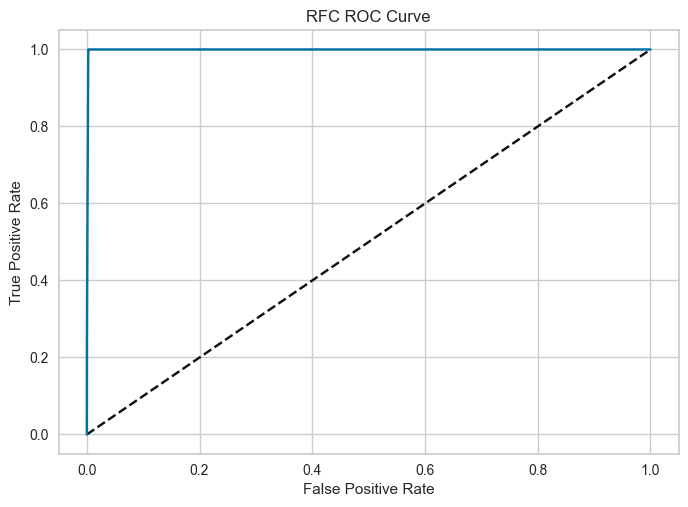

In [45]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve')
plt.show()


In [46]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [48]:
#use rfc model to predict probabilites on sample_submission converting it first to pca with 2 components random_state=42
sample_submission_pca = pca.transform(sample_submission)
y_pred_proba = rfc.predict_proba(sample_submission_pca)[:,1]
y_pred_proba

#add the predicted probabilities to the sample_submission dataframe
sample_submission['Incidence'] = y_pred_proba
sample_submission.head(1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:    5.8s finished


array([5.98546505e-02, 7.47635084e-05, 5.98546505e-02, ...,
       5.50745501e-06, 5.50745501e-06, 5.50745501e-06])

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm),Incidence
0,446859944,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.21,1.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.17,0.28,0.06


In [49]:
sample_submission.columns


Index(['PipeId', 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'InspectionYear', 'MonthsLastRev',
       'relative_risk', 'preventive_maintenance_rate', 'P

In [51]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop([ 'YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area', 'area_connection', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per year (days)', 'Yearly Sun Hours (hours)',
       'No_Inspections', 'average_severity_pipe', 'Average_MonthsLastRev',
       'pipe_inspected_frequently', 'No_Previous_Incidences',
       'No_Previous_Severity_High', 'No_Previous_Severity_Medium',
       'No_Previous_Severity_Low', 'InspectionYear', 'MonthsLastRev',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate',
       'Age_pipe_at_inspection', 'Population density (persons/sqkm)'], axis=1)


In [52]:
#show kaggle_submission
kaggle_submission.head(2)

,PipeId,Incidence
0,446859944,0.06
1,428124500,0.00


In [53]:
kaggle_submission.shape
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_pca_36_rf450_8_minsampleleaf.csv', index=False)


(909733, 2)

## Random Forest Classifier

In [36]:
del train_consolidated

# Trying a model that overfits

In [38]:
#rfc and cross validation using GridSearchCV to find best parameters and validate with a validation set with InspectionYear 2018 and 2019
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=2, class_weight='balanced_subsample', n_estimators=400, max_features='auto', max_depth=8, criterion='gini', min_samples_split=1, min_samples_leaf=1)


In [ ]:
#import StratifiedKFold
from sklearn.model_selection import StratifiedKFold


In [ ]:
#cross validation
cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)

In [ ]:
#use stratified kfold to split the data into train and validation sets
for train_index, val_index in cv.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#fit the model
rfc.fit(X_train, y_train)

#predict on validation set
y_pred = rfc.predict(X_val)

#check accuracy score
accuracy_score(y_val, y_pred)


In [ ]:
#for Diana's model

In [ ]:
#gridsearchcv
grid = GridSearchCV(estimator=rfc, cv=cv, scoring='roc_auc', verbose=2, n_jobs=-1)
grid.fit(X, y)

#best parameters
grid.best_params_

#best score
grid.best_score_

#best estimator
grid.best_estimator_

#predict on test set
y_pred = grid.predict(X_test)


In [39]:
rfc.fit(X, y)
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min


building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.6min


building tree 155 of 400
building tree 156 of 400
building tree 157 of 400building tree 158 of 400

building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.5min


building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400building tree 374 of 400

building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 12.0min finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_features='auto', min_samples_split=1,
                       n_estimators=400, n_jobs=-1, random_state=42, verbose=2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    4.6s finished


In [40]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    4.8s


0.9939245910613334


[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    5.5s finished


In [41]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [42]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 400 out of 400 | elapsed:    5.5s finished


In [43]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)

,PipeId,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,aspect,Relative_Thickness,pipe_area,area_connection,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),No_Inspections,average_severity_pipe,Average_MonthsLastRev,pipe_inspected_frequently,No_Previous_Incidences,No_Previous_Severity_High,No_Previous_Severity_Medium,No_Previous_Severity_Low,InspectionYear,MonthsLastRev,relative_risk,preventive_maintenance_rate,Probability_rate,Age_pipe_at_inspection,Population density (persons/sqkm),Incidence
0,446859944,0.82,0.17,0.01,0.00,0.00,0.00,0,0.00,0.03,0.00,0.00,0,1,0,0,0,1,0,0.03,0.00,0.00,0.86,0.77,0.64,0.15,0.38,0.20,0.83,0.36,1.00,0.21,1.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.17,0.28,0.03


In [49]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['YearBuilt', 'Diameter', 'Length', 'Pressure',
       'NumConnections', 'NumConnectionsUnder', 'BoolBridle', 'aspect',
       'Relative_Thickness', 'pipe_area',
       'area_connection', 'connection_bool', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Diameter2', 'Length2', 'Pressure2',
       'Average yearly temperature (°C)', 'Min. Temperature (°C)',
       'Max. Temperature (°C)', 'Yearly Rainfall (mm)',
       'Average year Humidity (%)', 'Rainy days per year (days)',
       'Yearly Sun Hours (hours)', 'No_Inspections', 'average_severity_pipe',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'No_Previous_Incidences', 'No_Previous_Severity_High',
       'No_Previous_Severity_Medium', 'No_Previous_Severity_Low',
       'InspectionYear', 'MonthsLastRev', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Age_pipe_at_inspection','Population density (persons/sqkm)'], axis=1)


In [50]:
#show kaggle_submission
kaggle_submission.head(10)

,PipeId,Incidence
0,446859944,0.03
1,428124500,0.10
2,438428871,0.02
3,429034569,0.12
4,411184477,0.06
5,428837983,0.03
6,428837841,0.05
7,428838331,0.11
8,1200432,0.16
9,1200564,0.04


In [51]:
kaggle_submission.shape

(909733, 2)

In [52]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_rf8_400_minsampleleaf.csv', index=False)

In [ ]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 2, verbose=1, n_estimators=100, max_features='auto', min_samples_leaf=1, min_samples_split=2, class_weight='balanced' )
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))


In [ ]:
#show classification report
print(classification_report(y_test, y_pred))

In [ ]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

In [ ]:
#count null in sample_submission
sample_submission.isnull().sum()

In [ ]:
sample_submission.head(10)

In [ ]:
sample_submission.shape

In [ ]:
#drop incidence in sample_submission
sample_submission = sample_submission.drop('Incidence', axis=1)

In [ ]:
#make predictions for submission using the model
predictions = rfc.predict_proba(sample_submission)
predictions = predictions[:, 1]

In [ ]:
#add predictions to submission
sample_submission ['Incidence'] = predictions

#show submission
sample_submission.head(1)


In [ ]:
sample_submission.columns

In [ ]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = sample_submission.drop(['Diameter', 'Length', 'Pressure', 'NumConnections', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Average_MonthsLastRev', 'MonthsLastRev', 'No_Inspections',
       'No_Incidences_Total', 'Age_pipe_at_inspection',
       'Population density (persons/sqkm)'], axis=1)


In [ ]:

#show kaggle_submission
kaggle_submission.head(10)


In [ ]:
kaggle_submission.shape

In [ ]:
#export kaggle_submission to csv
os.chdir(r"C:\Users\pedro\datathon")

kaggle_submission.to_csv('kaggle_submission_new_features_baseline.csv', index=False)


# Lazypredict

In [ ]:
#using lazypredict to  find the best model to predict on the dataset
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=False, custom_metric=None, predictions=True, random_state=42, n_jobs=-1)
models, predictions = clf.fit(X_train, X_train, X_test, y_test)
models
